<a href="https://colab.research.google.com/github/GhouI/RetailMarketAnalysis/blob/main/UniversityProjectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
dataset = pd.read_csv('retail_sales_dataset.csv')

Data Exploration

In [ ]:
#data types
print(dataset.dtypes)
#check for missing values
missing_values = dataset.isnull().sum()
#check for the percentage with the dataset missing values
missing_values_percentage = (dataset.isnull().sum() / len(dataset)) * 100
print(pd.DataFrame({'Missing Values': missing_values, 'Missing Values Percentage': missing_values_percentage}))


Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object
                  Missing Values  Missing Values Percentage
Transaction ID                 0                        0.0
Date                           0                        0.0
Customer ID                    0                        0.0
Gender                         0                        0.0
Age                            0                        0.0
Product Category               0                        0.0
Quantity                       0                        0.0
Price per Unit                 0                        0.0
Total Amount                   0                        0.0


Describing........
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


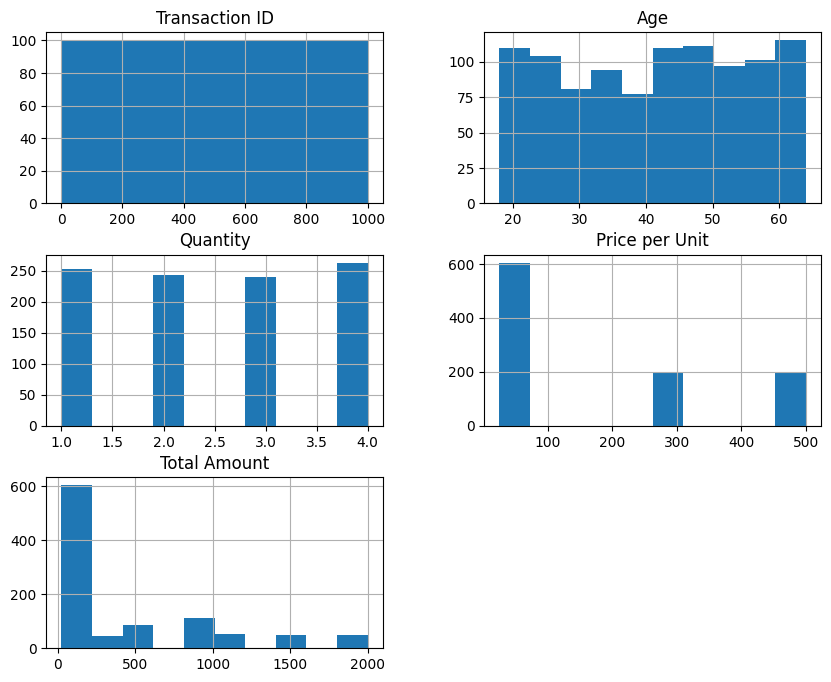

Column: Date
Date
2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-02-05     8
2023-08-05     8
              ..
2023-03-02     1
2023-08-02     1
2023-04-17     1
2023-03-30     1
2023-05-28     1
Name: count, Length: 345, dtype: int64 

Column: Customer ID
Customer ID
CUST1000    1
CUST001     1
CUST002     1
CUST003     1
CUST004     1
           ..
CUST013     1
CUST012     1
CUST011     1
CUST010     1
CUST009     1
Name: count, Length: 1000, dtype: int64 

Column: Gender
Gender
Female    510
Male      490
Name: count, dtype: int64 

Column: Product Category
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64 



In [ ]:
#Dataset Describing
print("Describing........")
print(dataset.describe())

dataset.hist(figsize=(10,8))  # Histogram of numerical features
plt.show()

for col in dataset.select_dtypes(include=["object","category"]).columns:
    print(f"Column: {col}")
    print(dataset[col].value_counts(), "\n")  # Counts for each category

Data Cleaning

In [ ]:

gendre_label_encoder = LabelEncoder()
product_category_label_encoder = LabelEncoder()

cloned_dataset = dataset.copy();

cloned_dataset.drop('Customer ID', axis=1, inplace=True)
cloned_dataset.drop('Date', axis=1, inplace=True)
cloned_dataset['Age'] = (cloned_dataset['Age'] - cloned_dataset['Age'].mean()) / cloned_dataset['Age'].std()
cloned_dataset['Gender'] = gendre_label_encoder.fit_transform(cloned_dataset['Gender'])
cloned_dataset['Product Category'] = product_category_label_encoder.fit_transform(cloned_dataset['Product Category'])
cloned_dataset.drop('Price per Unit', axis=1, inplace=True)
cloned_dataset.drop('Quantity', axis=1, inplace=True)

cleaned_datasets = pd.DataFrame(cloned_dataset)
cleaned_datasets.to_csv('cleaned_dataset.csv', index=False)


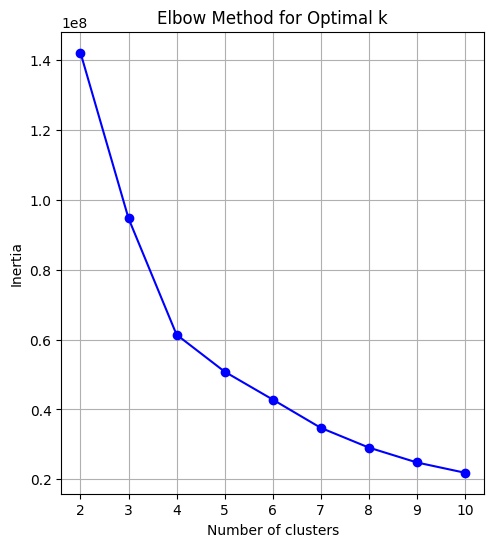

In [ ]:
#finding the thing
inertia = []

krange = range(2,11)
for k in krange:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(cleaned_datasets)
  inertia.append(kmeans.inertia_)

  if k>=2:
    labels = kmeans.labels_


# Plot the Elbow Method results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(krange, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)


In [ ]:
amount_of_clusters = 4
# Apply final K-means model with 4 clusters
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(cleaned_datasets)

# Add cluster labels to original dataset for analysis
dataset['Cluster'] = cluster_labels

# Get the cluster centers
centers = kmeans_final.cluster_centers_

# Analyze each cluster
for i in range(4):
    print(f"\nCluster {i} characteristics:")
    cluster_data = dataset[dataset['Cluster'] == i]

    # Size and percentage of the cluster
    cluster_size = len(cluster_data)
    cluster_percentage = cluster_size / len(dataset) * 100
    print(f"Size: {cluster_size} customers ({cluster_percentage:.2f}%)")

    # Numerical features statistics
    print("Age distribution:")
    print(cluster_data['Age'].describe())

    print("\nPurchase behavior:")
    print(f"Average Total Amount: ${cluster_data['Total Amount'].mean():.2f}")

    # Categorical features distribution
    print("\nGender distribution:")
    print(cluster_data['Gender'].value_counts(normalize=True) * 100)

    print("\nProduct Category preference:")
    print(cluster_data['Product Category'].value_counts(normalize=True) * 100)


Cluster 0 characteristics:
Size: 342 customers (34.20%)
Age distribution:
count    342.000000
mean      41.377193
std       13.862156
min       18.000000
25%       29.000000
50%       42.000000
75%       53.000000
max       64.000000
Name: Age, dtype: float64

Purchase behavior:
Average Total Amount: $136.10

Gender distribution:
Gender
Male      50.292398
Female    49.707602
Name: proportion, dtype: float64

Product Category preference:
Product Category
Clothing       35.672515
Beauty         32.163743
Electronics    32.163743
Name: proportion, dtype: float64

Cluster 1 characteristics:
Size: 189 customers (18.90%)
Age distribution:
count    189.000000
mean      40.941799
std       13.620299
min       18.000000
25%       28.000000
50%       41.000000
75%       53.000000
max       64.000000
Name: Age, dtype: float64

Purchase behavior:
Average Total Amount: $973.54

Gender distribution:
Gender
Female    53.968254
Male      46.031746
Name: proportion, dtype: float64

Product Category p